In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [32]:
# Λήψη δεδομένων μετοχής από το yfinance
symbol = 'AAPL'  # Παράδειγμα με μετοχή Apple
start_date = '2018-11-30'
end_date = '2023-11-30'
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed

In [33]:
# Επιλογή τιμής κλεισίματος ως χαρακτηριστικό
features = df[['Close']]

In [34]:
# Εισαγωγή της μελλοντικής τιμής κλεισίματος ως μεταβλητή πρόβλεψης
features = features.copy()
features['Next_Close'] = features['Close'].shift(-1)

In [35]:
# Αφαίρεση των τελευταίων γραμμών που περιέχουν NaN λόγω του shift
features = features.dropna()

In [36]:
# Επιλογή των χαρακτηριστικών και της μεταβλητής πρόβλεψης
X = features[['Close']]
y = features['Next_Close']

In [37]:
# Διαίρεση των δεδομένων σε σύνολα εκπαίδευσης και ελέγχου
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [38]:
# Δημιουργία και εκπαίδευση του μοντέλου Δέντρα Απόφασης
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
# Προβλέψεις στα δεδομένα ελέγχου
predictions = model.predict(X_test)

In [40]:
# Αξιολόγηση του μοντέλου
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.748106838829656


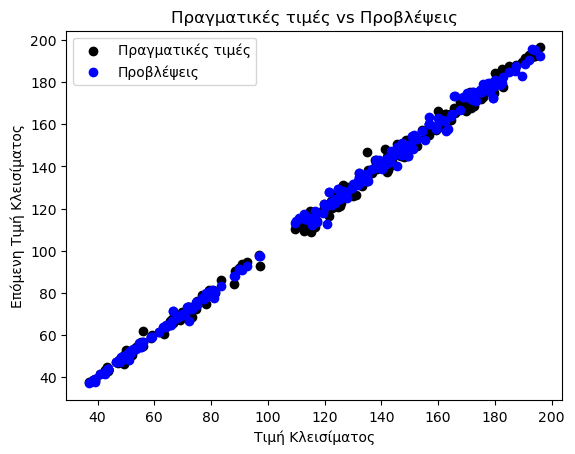

In [41]:
# Παρουσίαση των πραγματικών τιμών και των προβλέψεων
plt.scatter(X_test, y_test, color='black', label='Πραγματικές τιμές')
plt.scatter(X_test, predictions, color='blue', label='Προβλέψεις')
plt.xlabel('Τιμή Κλεισίματος')
plt.ylabel('Επόμενη Τιμή Κλεισίματος')
plt.title('Πραγματικές τιμές vs Προβλέψεις')
plt.legend()
plt.show()